# Comparing different Integration approaches to solve the Harmonic Oscillator

In [21]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt#%pylab inline
#import pylab
#import matplotlib
plt.rcParams['figure.figsize'] = (6.0,6.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 100

## The harmonic oscillator definition

This is a 2nd order ordinary differential equation

$$
\frac{d^2x}{dt^2} = -w_0^2 x 
$$

Substitute in $v(t)$, to turn into a coupled set of 2 first-order ODE

$$ 
v(t) = \frac{dx}{dt} 
$$

### Final set of evolution equations

$$ \frac{dv(t)}{dt} = -w_0^2 x $$

$$ \frac{dx(t)}{dt} = v(t)$$

Initial Condition: 

$$x(0) = cos(t + \phi) = cos(\phi) $$

$$\dot{x}(0) = v(0) = -w_0 sin(t + \phi) = -w_0 sin(\phi)$$

## List of variables

$$t: t$$

$$\Delta t: h$$

$$w_0: w\_0$$

$$\phi: phase$$

$$x(t) : x$$

$$\dot{x}(t) : v$$



## First Exploration: [Forward Euler](https://en.wikipedia.org/wiki/Euler_method#Informal_geometrical_description)

If we have a first order ordinary differential equation:

$$y'(t) = f(t,y(t)), \qquad y(t_0)=y_0. $$

To solve this approximately we can just think of the definition of the derivative. 
Choose a value $h$ for the size of every step and set $t_n = t_0 + nh$. Now, one step of the Euler method from $t_n$ to $t_{n+1} = t_n + h$ is:

$ y_{n+1} = y_n + hf(t_n,y_n).$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/1920px-Euler_method.svg.png" width=300>


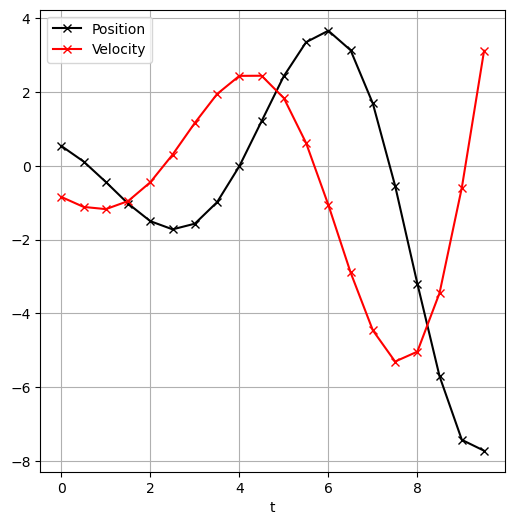

In [22]:
def SolveHarmOscEuler(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
        with the Euler method """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = np.zeros(N)
    
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
    v[0] = -w0*math.sin(0 + phase)

    for i in range(1,N):
        x[i] = x[i-1] + h * v[i-1] 
        v[i] = v[i-1] + h * (-w0**2) * x[i-1] 
        #v[i] = v[i-1] + h * (-w0**2) * x[i]    # using the predicted x[i-1] is already much more accurate! 
        #v[i] = v[i-1] + h * (-w0**2) * (x[i]+x[i-1])/2    # using the average x[i-1] is not much of an improvement! 

    t = np.arange(N)*h
    return x,v,t

x,v,t = SolveHarmOscEuler(10.0, .5, 1.0, 1.0)
plt.plot(t, x, 'kx-')
plt.plot(t, v, 'rx-')
plt.xlabel('t')
plt.legend(['Position', 'Velocity']);

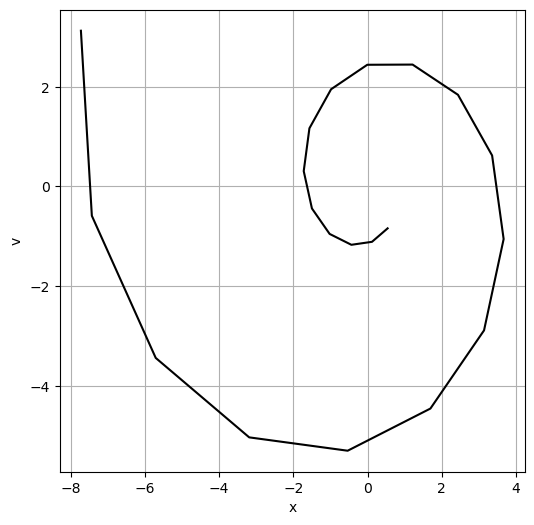

In [23]:
plt.plot(x, v, 'k-')
plt.xlabel('x')
plt.ylabel('v');

In [24]:
def SolveHarmOscAnalytic(tfinal, h, w0, phase):
    N = int(tfinal/h)
    h = tfinal/N
    t = np.arange(N)*h
    x = np.cos(w0*t + phase)
    v = -w0*np.sin(w0*t + phase)
    return x, v, t

In [25]:
def HarmRunner(solver, h=1.0, tfinal=2*2.0*np.pi, w0=1.0, phase=1.0):
    x, v, t = solver(tfinal, h, w0, phase)
    analytic_x, analytic_v, analytic_t = SolveHarmOscAnalytic(tfinal, h, w0, phase)
    
    plt.figure(figsize=(10,5))
        
    plt.subplot(1,2,1)
    plt.plot(t, analytic_x,'r')
    plt.plot(t, x,'x-',alpha=.4)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend(['analytic', 'numerical'], loc='best')
    
    plt.subplot(1,2,2)
    plt.plot(analytic_x, analytic_v, 'r')
    plt.plot(x, v,'kx-',alpha=.4)
    plt.xlabel('x(t)')
    plt.ylabel('v(t)')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.legend(['analytic', 'numerical'], loc='best')

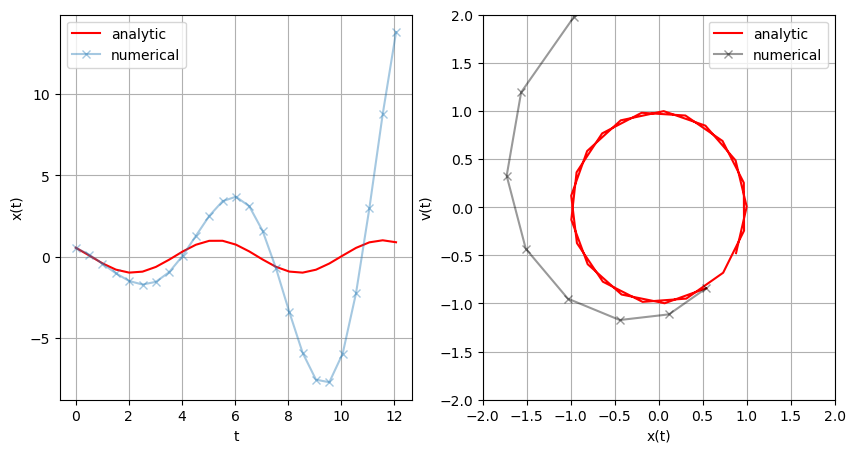

In [26]:
HarmRunner(SolveHarmOscEuler, h=.5, tfinal=4*np.pi, w0=1.0, phase=1.0)

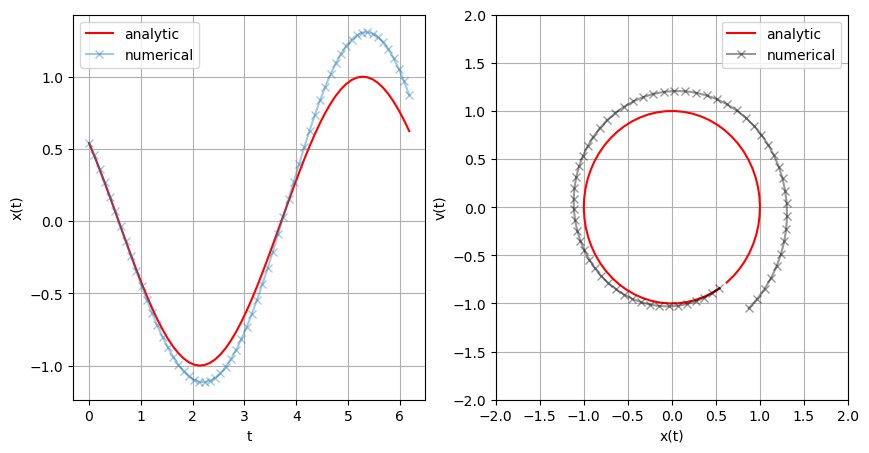

In [27]:
HarmRunner(SolveHarmOscEuler, h=0.1, tfinal=2*np.pi, w0=1.0, phase=1.0)

In [28]:
from matplotlib import animation
from IPython.display import HTML

def HarmMovie(solver, h=1.0, tfinal=2*2.0*np.pi, w0=1.0, phase=1.0):
    x, v, t = solver(tfinal, h, w0, phase)
    
    skiprate = int(len(t) / 100)
    skiprate = max(skiprate, 1)
    t = t[::skiprate]
    x = x[::skiprate]
    v = v[::skiprate]
    # create a simple animation
    fig = plt.figure()

    ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('v')
    plt.close() # this makes sure the empty initial plot is not shown separately

        
    def init():
        line.set_data([], [])
        return line,
    
    def animate(i):
        line.set_data(x[:i], v[:i])
        return line,
    
    return animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(t), interval=60, blit=True)

In [29]:
HTML(HarmMovie(SolveHarmOscEuler, h=0.1).to_jshtml())

## Wow, that's horrible!  Use the next cell to experiment with the stepsize

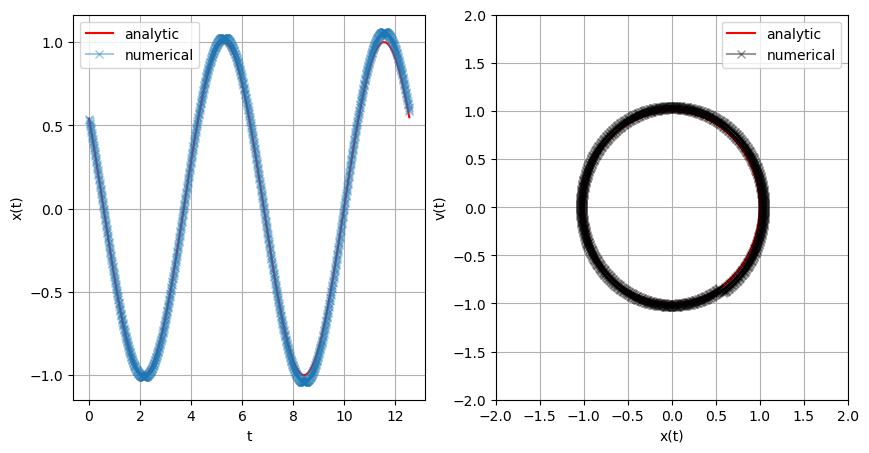

In [30]:
HarmRunner(SolveHarmOscEuler, h=0.01)

## [Backward Euler](https://en.wikipedia.org/wiki/Backward_Euler_method)

In numerical analysis and scientific computing, the backward Euler method (or implicit Euler method) is one of the most basic numerical methods for the solution of ordinary differential equations. It is similar to the (standard) Euler method, but differs in that it is an implicit method. The backward Euler method has error of order one in time.

$$x_i = x_{i-1} + \frac{h*v_{i-1}}{1.0 + h^2 w_0^2}$$

$$v_i = v_{i-1} - h w_0^2 x_i$$

In [31]:
def SolveHarmOscEulerBackward(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
        with the Euler method """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
    v[0] = -w0*math.sin(0 + phase)

    for i in range(1,N):
        x[i] = (x[i-1] + h*v[i-1] )/(1 + h*h*w0*w0)
#        v[i] = (x[i]-x[i-1])/h
        v[i] = v[i-1] - h*w0*w0*x[i]
    t = np.arange(N)*h
    return x,v,t

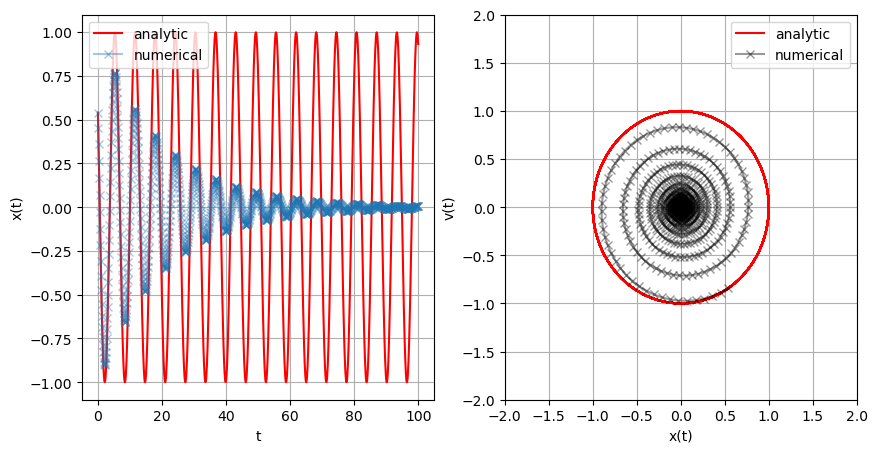

In [32]:
HarmRunner(SolveHarmOscEulerBackward, h=0.1, tfinal=100.0)

## [Heun Method](https://en.wikipedia.org/wiki/Heun%27s_method)

    Step x using Forward Euler
    Step v using an average of x[i] and x[i-1]
    Correct x using an average of v[i] and v[i-1]


The procedure for calculating the numerical solution to the initial value problem:

$$y'(t) = f(t,y(t)), \qquad \qquad y(t_0)=y_0,$$
by way of Heun's method, is to first calculate the intermediate value $\tilde{y}_{i+1}$ and then the final approximation $y_{i+1}$ at the next integration point.
$\tilde{y}_{i+1} = y_i + h f(t_i,y_i)$

$y_{i+1} = y_i + \frac{h}{2}[f(t_i, y_i) + f(t_{i+1},\tilde{y}_{i+1})]$


    

In [33]:
def SolveHarmOscHeun(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
        with the Heun method """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
    v[0] = -w0*math.sin(0 + phase)

    for i in range(1,N):
        x[i] = x[i-1] + h * v[i-1] 
        v[i] = v[i-1] + h * (-w0**2) * (x[i]+x[i-1])/2
        x[i] = x[i-1] + h * (v[i] + v[i-1])/2
        
    t = np.arange(N)*h
    return x,v,t

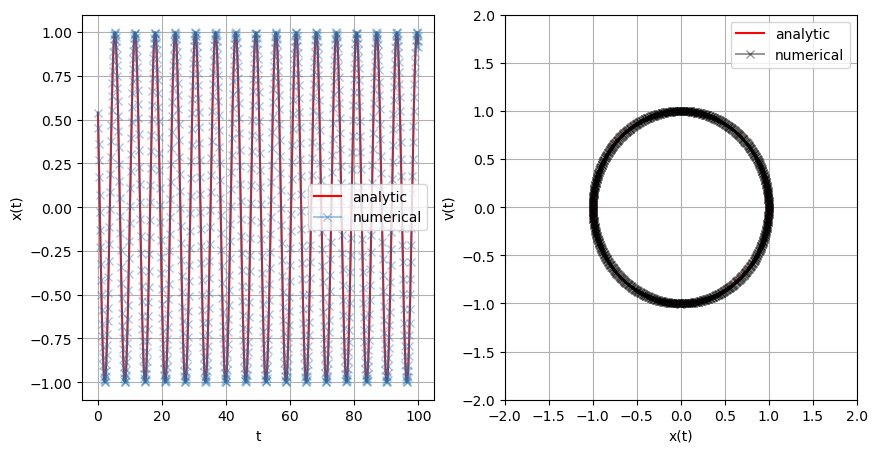

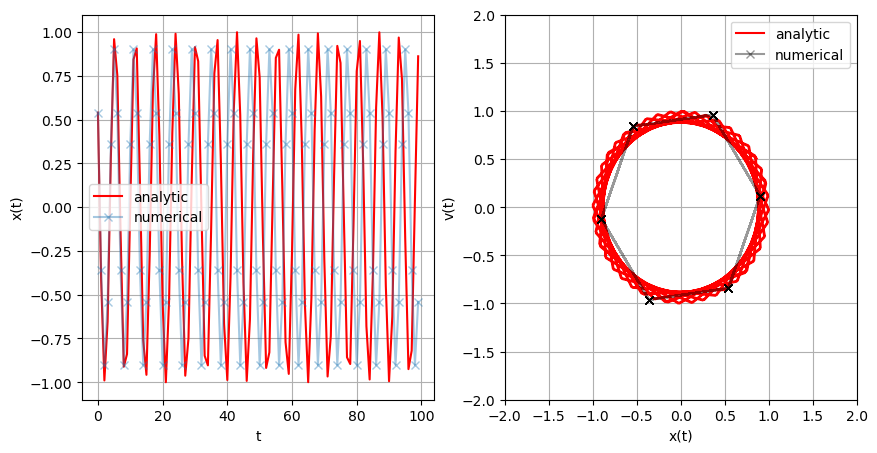

In [34]:
HarmRunner(SolveHarmOscHeun, h=0.1, tfinal=100.0)
HarmRunner(SolveHarmOscHeun, h=1.0, tfinal=100)

In [35]:
def RightFirstDerivative(a,b,c,y0,y1,y2):
    """fit a parabola through the three data pairs and give back
    the slope at the right most point (c)"""
    return ((-b+c)*y0)/((a-b)*(a-c)) + ((a-c)*y1)/((a-b)*(b-c)) + y2/(-a+c) + y2/(-b+c);

def LeftFirstDerivative(a,b,c,y0,y1,y2):
    """first derivative at left most point (a)"""
    return y0/(a-b) + y0/(a-c) + ((a-c)*y1)/((-a+b)*(b-c)) + ((a-b)*y2)/((-a+c)*(-b+c));

def MiddleFirstDerivative(a,b,c,y0,y1,y2):
    """first derivative at the mid point"""
    return ((b-c)*y0)/((a-b)*(a-c)) + y1/(-a+b) + y1/(b-c) + ((a-b)*y2)/((a-c)*(-b+c));

## [Verlet Integration](https://en.wikipedia.org/wiki/Verlet_integration)
Thinks of the integration of a single second order ordinary differential equation rather than having two first order ODEs.

In [36]:
def SolveHarmOscVerlet(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
    """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
    x[1] = math.cos(w0*h + phase)
# loop, changing the values of the x and y datasets
    for i in range(1,N-1):
        x[i+1] = (2.-h*h * w0*w0)*x[i] - x[i-1]
        v[i]   = (x[i+1]-x[i-1])/(2*h)

#    v[N-1] = -w0*math.sin(w0*(N-1)*h    + phase)
    v[N-1] = RightFirstDerivative(0,h,2*h,x[N-3],x[N-2],x[N-1])
    v[0] = (x[1]-x[0])/h
    t = np.arange(N)*h
    return x,v,t

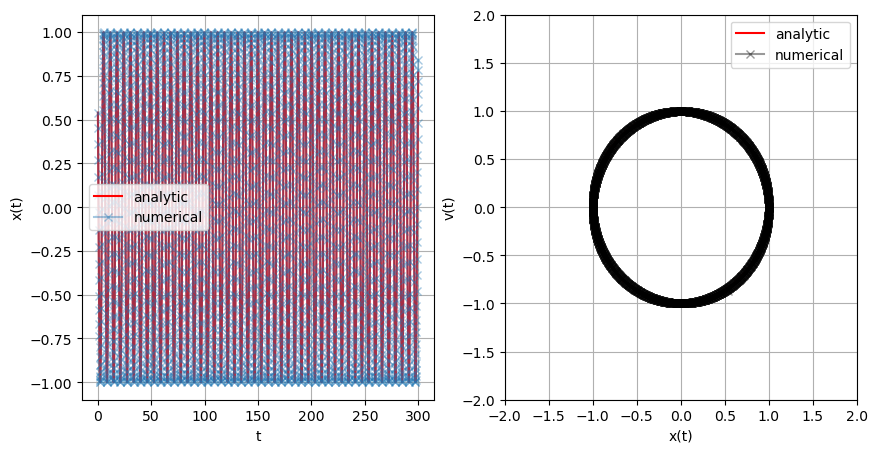

In [37]:
HarmRunner(SolveHarmOscVerlet, h=.1, tfinal=300.0)

## [Numerov's method](https://en.wikipedia.org/wiki/Numerov%27s_method)
Specifically useful for one-dimensional Schrödinger equation among others. 

In [38]:
def SolveHarmOscNumerov(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
    """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    # "cheating" using the analytic solution for start
    x[0] = math.cos(0      + phase)  
    x[1] = math.cos(w0*h   + phase)

    v[0] = -w0*math.sin(w0*0    + phase)

# loop, changing the values of the x and y datasets
    for i in range(1,N-1):
        f = w0*w0;
#        x[i+1] = ((2.-5.*h*h/6.*f)*x[i] - (1.+h*h/12.*f)*x[i-1])/(1.+h*h/12*f)
        x[i+1] = (2.-5.*h*h/6.*f)/(1.+h*h/12*f)*x[i]-x[i-1]
        v[i] = (x[i+1]-x[i-1])/(2.*h)

    v[N-1] = RightFirstDerivative(0,h,2*h,x[N-3],x[N-2],x[N-1])
    t = np.arange(N)*h
    return x,v,t

## In class excercise:

Let's implement a so called 4th order [Yoshida leapfrog](https://en.wikipedia.org/wiki/Leapfrog_integration#4th_order_Yoshida_integrator). 

For that work through the [Leapfrog integrator](https://en.wikipedia.org/wiki/Leapfrog_integration) in the cell below which you then can use as a template to implement the Yoshida integrator (Make a copy so we can compare the Leapfrog to the Yoshida integrator). 
Reuse some of the routines above for plotting and testing. 


## [Leapfrog integration](https://en.wikipedia.org/wiki/Leapfrog_integration)

In [39]:
def SolveHarmOscLeapFrog(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
    """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
    v[0] = -w0*math.sin(0*w0 + phase)

## update x then v 
    for i in range(1,N):
#        x[i] = x[i-1] + h*v[i-1]                # basic forward Euler looks like this
#        v[i] = v[i-1] + h*(-w0**2 * x[i-1])
        x[i] = x[i-1] + h/2 * v[i-1]
        v[i] = v[i-1] + h * (-w0**2) * x[i]
        x[i] = x[i] + h/2 * v[i]
# alternative form all in one go
#for i in range(1,N):
#       x[i] = x[i-1] + h * v[i-1] + h*h/2* (-w0**2)*x[i-1]
#        v[i] = v[i-1] + h * (-w0**2) * (x[i-1] + x[i])/2

    t = np.arange(N)*h
    return x,v,t

In [40]:
def SolveHarmOscHermite(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
    """
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
    v[0] = -w0*math.sin(0 + phase)

# predictor corrector step
#    for i in range(1,N):
#        xp = x[i-1] + h * v[i-1] + h*h/2* (-w0**2)*x[i-1] \
#            + h*h*h/6 * (-w0**2)*v[i-1]
#        vp = v[i-1] + h * (-w0**2) * (x[i-1]) \
#            + h*h/2 * (-w0**2)*v[i-1]
#        v[i] = v[i-1] + h * (-w0**2) * (x[i-1] + xp)/2 \
#            + h*h/12 * (-w0**2)*(vp-v[i-1])
#        x[i] = x[i-1] + h * (v[i-1]+vp)/2 - h*h/10* (-w0**2)*(xp-x[i-1]) \
#        +  h**3/120.*(-w0**2*(vp+v[i-1]))

    for i in range(1,N):
        x[i] = x[i-1] + h * v[i-1] + h*h/2* (-w0**2)*x[i-1] \
            + h*h*h/6 * (-w0**2)*v[i-1]
        v[i] = v[i-1] + h * (-w0**2) * (x[i-1]) \
            + h*h/2 * (-w0**2)*v[i-1]
        v[i] = v[i-1] + h * (-w0**2) * (x[i-1] + x[i])/2 \
            + h*h/12 * (-w0**2)*(v[i-1]-v[i]) 
        x[i] = x[i-1] + h * (v[i-1]+v[i])/2 + h*h/12* (-w0**2)*(x[i-1] - x[i])
    t = np.arange(N)*h
    return x,v,t

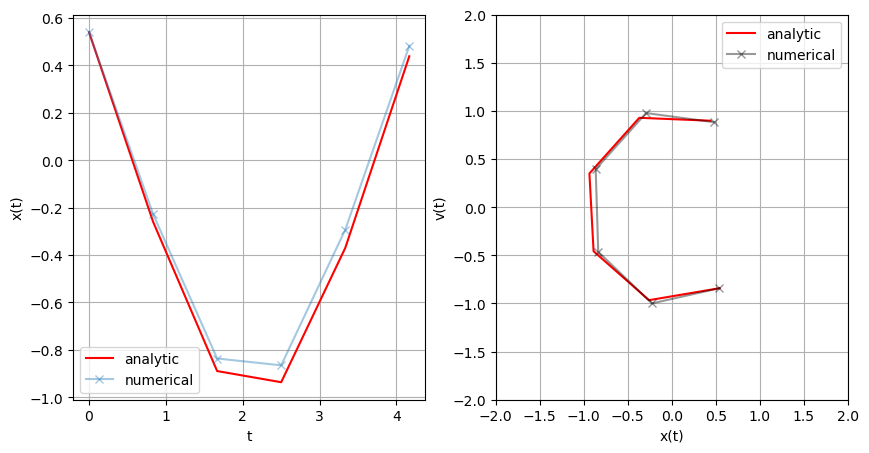

In [41]:
HarmRunner(SolveHarmOscLeapFrog, h=0.8, tfinal=5.0)

In [42]:
def f(y,w0=1.):
    return np.array((y[1],-w0**2*y[0]))

def SolveHarmOscRK4(tfinal, h, w0, phase):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2= - w0^2 x
        with the RK4 """
    N = int(tfinal/h)
    h = tfinal/N

    x0 = np.cos(0 + phase)  # "cheating" using the analytic solution for start
    v0 = -w0*np.sin(0 + phase)

    y = np.array((x0,v0)) # initial conditions
    res = np.zeros((2,N), dtype=float)
    res[:,0] = y

    t = np.zeros(N,dtype=float)
    for i in range(0,N-1):
        k1 = h*f(y, w0=w0)
        k2 =  h*f(y+k1/2, w0=w0)
        k3 =  h*f(y+k2/2, w0=w0)
        k4 =  h*f(y+k3,   w0=w0)
        y += 1./6 * (k1+2.*k2+2.*k3+k4)
        res[:,i+1] = y
        t[i+1] = h*i

    return res[0,:],res[1,:],t

## Now do a convergence study

Want to know: How does our error behave as the step-size is changed?

In [43]:
def energy(x, v, w0):
    return 0.5*w0**2*x**2 + 0.5*v**2

def dE(x, v, w0, Energy):
    e = energy(x, v, w0)
    de = np.fabs(e - Energy)
    return de
    
def L2(y, ye):
    """Compute the L2 error norm on two input arrays. One approximate the other exact"""
    return math.sqrt(((y[1:-1] - ye[1:-1])**2).sum()/(ye[1:-1]**2).sum())

In [52]:
tfinal = 2*2.*np.pi
w0 = 1
phase = 1

# Set up a list of step sizes
hs = np.logspace(0, -3, 5)

# Set up a Python Dictionary to store all of our Solvers
Solvers = {
           'Euler': SolveHarmOscEuler,
           'Back-Euler': SolveHarmOscEulerBackward,
           'Heun': SolveHarmOscHeun,
           'Numerov': SolveHarmOscNumerov,
           'Leap-Frog': SolveHarmOscLeapFrog,
           'Verlet' : SolveHarmOscVerlet,
           'Hermite': SolveHarmOscHermite,
           'RK4'    : SolveHarmOscRK4
           }

for key, value in Solvers.items():
    print(key, value)


Euler <function SolveHarmOscEuler at 0x11bdb6550>
Back-Euler <function SolveHarmOscEulerBackward at 0x11bde84c0>
Heun <function SolveHarmOscHeun at 0x11b62b0d0>
Numerov <function SolveHarmOscNumerov at 0x11c236af0>
Leap-Frog <function SolveHarmOscLeapFrog at 0x11b75d9d0>
Verlet <function SolveHarmOscVerlet at 0x11c1184c0>
Hermite <function SolveHarmOscHermite at 0x11c236790>
RK4 <function SolveHarmOscRK4 at 0x11b8e64c0>


In [53]:
Ns = np.empty(len(hs), dtype='int')

# Now use a Python Dictionary to store our test results
L2_errors = {} # This is a dictionary

for key in Solvers.keys():
    L2_errors[key] = np.zeros_like(hs, dtype='float64')
    
for i, h in enumerate(hs):
    analytic_x, analytic_v, analytic_t = SolveHarmOscAnalytic(tfinal, h, w0, phase)
    Ns[i] = int(tfinal/h)
    for key, solver in Solvers.items():
        x, v, t = solver(tfinal, h, w0, phase)
        L2_errors[key][i] = L2(x,analytic_x)

In [54]:
print(('Steps     ', [N for N in Ns]))
for key, value in L2_errors.items():
    print ((key + '       ')[:10], ['%0.2e' % val for val in value])

('Steps     ', [12, 70, 397, 2234, 12566])
Euler      ['2.02e+01', '1.06e+00', '1.30e-01', '2.17e-02', '3.82e-03']
Back-Euler ['8.88e-01', '4.57e-01', '1.12e-01', '2.11e-02', '3.80e-03']
Heun       ['2.93e-01', '7.98e-03', '2.57e-04', '8.17e-06', '2.58e-07']
Numerov    ['1.75e-02', '1.36e-05', '1.36e-08', '2.06e-11', '6.28e-11']
Leap-Frog  ['2.93e-01', '7.98e-03', '2.57e-04', '8.17e-06', '2.58e-07']
Verlet     ['3.27e-01', '8.45e-03', '2.71e-04', '8.61e-06', '2.72e-07']
Hermite    ['3.66e-02', '3.20e-05', '3.20e-08', '3.22e-11', '3.38e-14']
RK4        ['6.58e-02', '5.77e-05', '5.69e-08', '5.72e-11', '5.79e-14']


/var/folders/8h/csrqy1dd1x1d93qvzyh33kn40000gn/T/ipykernel_80731/2248002137.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(Ns, Ns.astype('float64')**(-2)*1e2, '-', label=r'$\propto N{^-2}$', ls='--', lw=3.0)


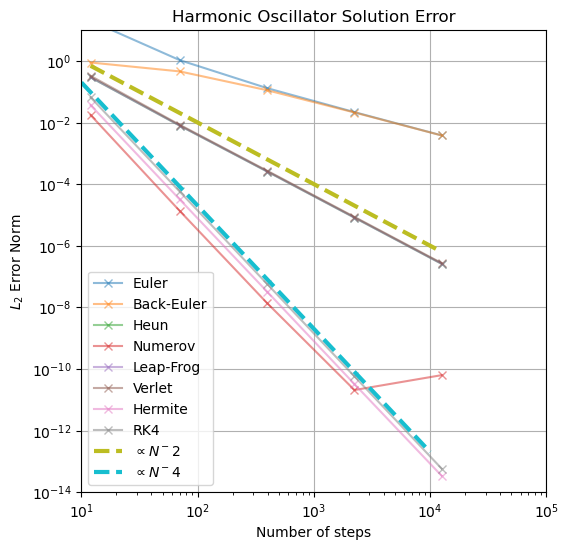

In [55]:
for solver, l2 in L2_errors.items():
    p = plt.loglog(Ns, l2, marker='x', alpha=0.5, label=solver)

plt.loglog(Ns, Ns.astype('float64')**(-2)*1e2, '-', label=r'$\propto N{^-2}$', ls='--', lw=3.0)
plt.loglog(10.**(np.arange(4)+1),(10.**(np.arange(4)+1))**(-4)*2e3, label=r'$\propto N{^-4}$',ls='--', lw=3.0)
plt.legend(loc='best')
plt.xlabel('Number of steps')
plt.ylabel('$L_2$ Error Norm')
plt.title('Harmonic Oscillator Solution Error')
plt.ylim((1e-14,1e1));
plt.xlim((1e1,1e5));

In [48]:
h = 0.001
tfinal = 10.0
solution = {}
for solver_name, solver in Solvers.items():
    solution[solver_name] = solver(tfinal, h, w0, phase)
solution['Analytic'] = SolveHarmOscAnalytic(tfinal, h, w0, phase)

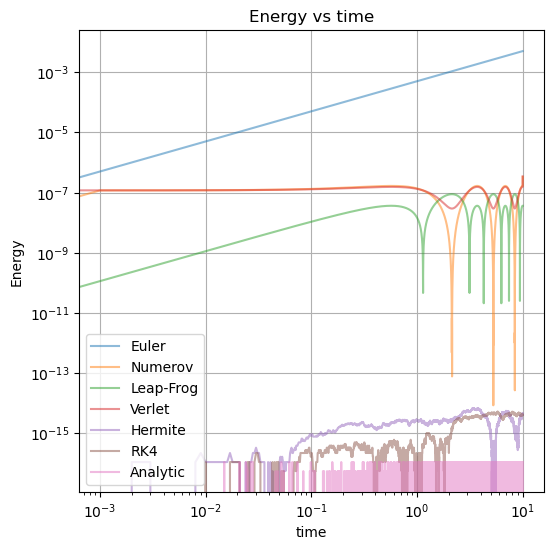

In [49]:
from numpy import fabs
Energy = .5 # w0*w0/2 * x[0]*x[0] +  va[0]*va[0]/2;

for solver, (x, v, t) in solution.items():
    plt.loglog(t, dE(x, v, w0, Energy), label=solver, alpha=.5)

plt.title('Energy vs time')
plt.xlabel('time')
plt.ylabel('Energy')
plt.legend(loc='best');

## The Verlet and leap frog methods are indeed identical!  Euler is terrible and Hermite integration is what we want if we can afford it.

Playground: 
If you have time you may want to play this through for a damped oscillator.


## Modification for an oscilator with damping

### Final set of evolution equations
$$ \frac{dv(t)}{dt} = -w_0^2 x - w_0 D v(t)$$
$$ \frac{dx(t)}{dt} = v(t)$$

with $D$ a scalar. 

In [56]:
def SolveDampedHarmOscLeapFrog(tfinal, h, w0, phase, damp=0.3):
    """ Compute x(t) of the harmonic oscillator d^2x/dt^2 + damp dx/dt = - w0^2 x 
    """
    damp = w0*damp
    N = int(tfinal/h)
    h = tfinal/N

    x = np.zeros(N)
    v = x.copy()
    
    x[0] = math.cos(0 + phase)  # "cheating" using the analytic solution for start
#    v[0] = -w0*math.sin(h/2*w0 + phase)
    v[0] = -w0*math.sin(0*w0 + phase)

## update x then v 
    for i in range(1,N):
#        x[i] = x[i-1] + h*v[i-1]
#        v[i] = v[i-1] + h*(-w0**2 * x[i])
        x[i] = x[i-1] + h/2 * v[i-1]
        v[i] = v[i-1] + h * (-w0**2) * x[i] - h * damp * v[i-1]
        x[i] = x[i] + h/2 * v[i]
# alternative form all in one go
#for i in range(1,N):
#       x[i] = x[i-1] + h * v[i-1] + h*h/2* (-w0**2)*x[i-1]
#        v[i] = v[i-1] + h * (-w0**2) * (x[i-1] + x[i])/2

    t = np.arange(N)*h
    return x,v,t

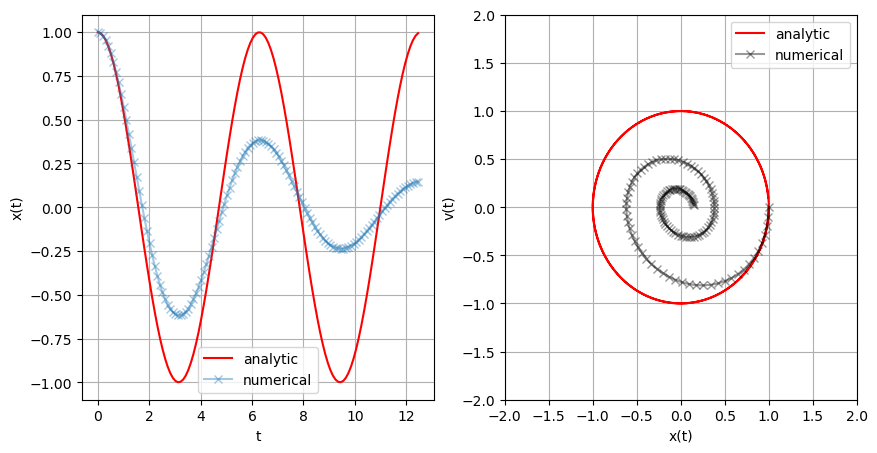

In [57]:
HarmRunner(SolveDampedHarmOscLeapFrog, h = 0.1, w0=1., phase=0.)

Scipy includes a convenience function interface that allows to use many differen solvers for this type of initial value problems integrating systems of ODEs. 
[scipy.integrate.solve_bvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy.integrate.solve_bvp) 
We will take some time for homework problems where we will try these out. 